# Task 1: Use all collected ratings to derive possible dimension and item loadings of interpersonal speaker characteristics. Note that also an inverse interpretation of the ratings is possible. Please split the data in male and female speakers before performing the factor analysis. File to use: likeability_dimension_ratings.csv

### Step 1: Library imports and reading in data

In [1]:
# install.packages('dplyr')      # processing 
# install.packages('gdata')      # file reading
# install.packages('psych')      # KMO test and PCA prediction
# install.packages('Hmisc')      # correlation matricies
# install.packages('DMwR')       # imputing NA values
# install.packages('ggfortify')  # PCA visualization

In [2]:
# include libraries
library(dplyr)      # processing
library(readxl)     # reading in data
library(psych)      # KMO test and PCA prediction
library(Hmisc)      # correlation matricies
library(DMwR)       # imputing NA values
library(ggfortify)  # PCA visualization


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha


Attaching package: 'Hmisc'

The following object is masked from 'package:psych':

    describe

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: grid
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Warning message:
"package 'ggfortify' was built under R version 3.6.2"
Attaching package: 'ggfortify'


In [3]:
# read in data sets
whole_data <- read.csv('datasets/DB02_speaker_likeability_dimension_ratings.csv')
whole_data <- as.data.frame(knnImputation(whole_data)) 

male_data <- (whole_data %>% filter(speaker_gender == 'male'))[-c(1:9)]
female_data <- (whole_data %>% filter(speaker_gender == 'female'))[-c(1:9)]
whole_data <- whole_data[-c(1:9)]

head(female_data)

unsympatisch,sicher,attraktiv,verstaendnislos,unentschieden,unaufdringlich,distanziert,gelangweilt,emotional,nicht.genervt,...,freundlich,maennlich,gehorsam,gleichgueltig,interessant,zynisch,aufgesetzt,intelligent,kindlich,bescheiden
18,79,83,86,18,72,12,18,64,82,...,78,10,67,75,76,26,12,87,60,71
0,100,100,0,0,100,0,0,29,100,...,100,100,100,0,100,0,0,83,70,100
19,62,43,19,39,84,19,33,56,85,...,81,0,86,42,53,16,22,67,38,81
33,56,57,44,34,30,41,40,56,86,...,72,5,40,24,63,62,29,57,30,47
100,32,0,28,81,87,76,67,16,31,...,79,28,87,25,28,77,79,70,74,83
3,88,87,15,9,86,19,25,75,68,...,89,13,47,29,88,45,17,87,17,54


### Step 2: Checking if PCA can be applied directly => KMO test

In [4]:
# KMO test: PCA only fine if overall MSA > 0.5
paste0('KMO test for whole data set:')
KMO(whole_data)
paste0('KMO test for male speaker data set:')
KMO(male_data)
paste0('KMO test for female speaker data set:')
KMO(female_data)

[1] "KMO test for whole data set:"

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = whole_data)
Overall MSA =  0.93
MSA for each item = 
   unsympatisch          sicher       attraktiv verstaendnislos   unentschieden 
           0.96            0.87            0.93            0.96            0.86 
 unaufdringlich     distanziert     gelangweilt       emotional   nicht.genervt 
           0.91            0.96            0.95            0.95            0.97 
          aktiv        angenehm    charakterlos        gesellig       entspannt 
           0.93            0.96            0.97            0.96            0.89 
    mitfuehlend        dominant    unaffektiert        herzlich             alt 
           0.95            0.91            0.83            0.95            0.73 
     unsachlich           ruhig     inkompetent       haesslich      freundlich 
           0.86            0.84            0.95            0.93            0.96 
      maennlich        gehorsam   gleichgueltig     interessant         zynisch 
       

[1] "KMO test for male speaker data set:"

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = male_data)
Overall MSA =  0.92
MSA for each item = 
   unsympatisch          sicher       attraktiv verstaendnislos   unentschieden 
           0.95            0.88            0.91            0.95            0.84 
 unaufdringlich     distanziert     gelangweilt       emotional   nicht.genervt 
           0.90            0.95            0.94            0.95            0.97 
          aktiv        angenehm    charakterlos        gesellig       entspannt 
           0.93            0.96            0.97            0.96            0.89 
    mitfuehlend        dominant    unaffektiert        herzlich             alt 
           0.93            0.92            0.86            0.94            0.68 
     unsachlich           ruhig     inkompetent       haesslich      freundlich 
           0.85            0.83            0.95            0.92            0.95 
      maennlich        gehorsam   gleichgueltig     interessant         zynisch 
        

[1] "KMO test for female speaker data set:"

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = female_data)
Overall MSA =  0.93
MSA for each item = 
   unsympatisch          sicher       attraktiv verstaendnislos   unentschieden 
           0.96            0.87            0.94            0.96            0.87 
 unaufdringlich     distanziert     gelangweilt       emotional   nicht.genervt 
           0.92            0.96            0.95            0.95            0.97 
          aktiv        angenehm    charakterlos        gesellig       entspannt 
           0.93            0.96            0.97            0.96            0.88 
    mitfuehlend        dominant    unaffektiert        herzlich             alt 
           0.95            0.90            0.80            0.95            0.79 
     unsachlich           ruhig     inkompetent       haesslich      freundlich 
           0.86            0.84            0.94            0.94            0.96 
      maennlich        gehorsam   gleichgueltig     interessant         zynisch 
      

##### As Measure of Sampling Adequacy > 0.5 for every item & overall in every data set [even in whole data set] 
##### => PCA can be performed directly

### Step 3: Compute correlation matricies and their eigenvalues
#### Note: Look at high correlation pairs to presume factors

In [5]:
# Not strictly linear relationships between the variables 
# Hence: Compute no Pearson but Spearman correlation matricies
corr_data_spearman_male <- rcorr(as.matrix(male_data), type=c("spearman"))
corr_data_spearman_female <- rcorr(as.matrix(female_data), type=c("spearman"))

In [6]:
# pro forma: display p values of variables in each data set
paste0('p value matrix of variables in male data set:')
head(as.data.frame(corr_data_spearman_male$P))
paste0('p value matrix of variables in female data set:')
head(as.data.frame(corr_data_spearman_female$P))

[1] "p value matrix of variables in male data set:"

,unsympatisch,sicher,attraktiv,verstaendnislos,unentschieden,unaufdringlich,distanziert,gelangweilt,emotional,nicht.genervt,...,freundlich,maennlich,gehorsam,gleichgueltig,interessant,zynisch,aufgesetzt,intelligent,kindlich,bescheiden
unsympatisch,NA,0.00000000,0.000000e+00,0.000000e+00,3.729368e-08,4.440892e-16,0.000000e+00,0.000000000,0.000000e+00,0.000000e+00,...,0.000000e+00,1.683731e-03,1.626422e-06,0.000000e+00,0.000000e+00,1.431402e-07,0.000000e+00,0.000000e+00,1.403809e-06,0.0000000000
sicher,0.000000e+00,NA,0.000000e+00,0.000000e+00,0.000000e+00,1.134659e-02,1.989453e-09,0.000000000,6.009907e-03,1.411268e-09,...,0.000000e+00,0.000000e+00,0.000000e+00,1.310063e-14,0.000000e+00,2.498002e-13,3.602889e-10,0.000000e+00,0.000000e+00,0.0017030308
attraktiv,0.000000e+00,0.00000000,NA,0.000000e+00,5.132774e-10,8.585796e-07,0.000000e+00,0.000000000,0.000000e+00,0.000000e+00,...,0.000000e+00,2.391826e-05,1.617538e-01,0.000000e+00,0.000000e+00,8.866997e-01,3.816947e-13,0.000000e+00,8.243352e-09,0.0008619528
verstaendnislos,0.000000e+00,0.00000000,0.000000e+00,NA,6.661338e-16,0.000000e+00,0.000000e+00,0.000000000,0.000000e+00,0.000000e+00,...,0.000000e+00,8.349259e-08,3.862688e-12,0.000000e+00,0.000000e+00,8.881784e-16,2.398082e-14,0.000000e+00,7.329725e-05,0.0000000000
unentschieden,3.729368e-08,0.00000000,5.132774e-10,6.661338e-16,NA,2.861063e-02,1.002144e-03,0.000000000,7.990285e-01,1.276752e-08,...,1.405542e-13,0.000000e+00,1.484191e-08,5.639933e-13,8.659740e-15,5.317311e-05,2.315920e-05,0.000000e+00,0.000000e+00,0.0238787027
unaufdringlich,4.440892e-16,0.01134659,8.585796e-07,0.000000e+00,2.861063e-02,NA,3.230138e-04,0.001472286,6.368832e-06,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,4.780395e-01,1.166395e-02,0.000000e+00,0.000000e+00,4.440892e-16,6.632936e-08,0.0000000000


[1] "p value matrix of variables in female data set:"

,unsympatisch,sicher,attraktiv,verstaendnislos,unentschieden,unaufdringlich,distanziert,gelangweilt,emotional,nicht.genervt,...,freundlich,maennlich,gehorsam,gleichgueltig,interessant,zynisch,aufgesetzt,intelligent,kindlich,bescheiden
unsympatisch,NA,9.081180e-12,0.000000e+00,0.000000e+00,1.188604e-08,0.000000e+00,0.000000e+00,0.000000000,0.000000e+00,0.000000e+00,...,0.000000e+00,6.204415e-11,4.440892e-16,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00,0,0.03287391,0.000000e+00
sicher,9.081180e-12,NA,0.000000e+00,3.407186e-11,0.000000e+00,3.227831e-05,5.810349e-08,0.000000000,5.417910e-07,3.730925e-06,...,3.945667e-08,1.507324e-04,0.000000e+00,0.0000000,0.000000e+00,0.000000e+00,1.383467e-09,0,0.00000000,0.000000e+00
attraktiv,0.000000e+00,0.000000e+00,NA,0.000000e+00,4.404646e-10,0.000000e+00,0.000000e+00,0.000000000,0.000000e+00,0.000000e+00,...,0.000000e+00,4.440892e-15,7.602943e-07,0.0000000,0.000000e+00,4.987566e-12,0.000000e+00,0,0.55215118,2.011618e-08
verstaendnislos,0.000000e+00,3.407186e-11,0.000000e+00,NA,6.932233e-13,0.000000e+00,0.000000e+00,0.000000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0000000,0.000000e+00,0.000000e+00,0.000000e+00,0,0.42728014,0.000000e+00
unentschieden,1.188604e-08,0.000000e+00,4.404646e-10,6.932233e-13,NA,8.876081e-04,8.192236e-04,0.000000000,3.078305e-02,1.556542e-06,...,5.354779e-09,7.863737e-08,0.000000e+00,0.0000000,0.000000e+00,9.414691e-14,2.336689e-08,0,0.00000000,5.839351e-07
unaufdringlich,0.000000e+00,3.227831e-05,0.000000e+00,0.000000e+00,8.876081e-04,NA,3.220686e-10,0.006509998,1.529543e-01,0.000000e+00,...,0.000000e+00,9.391932e-10,0.000000e+00,0.8646457,8.723708e-05,0.000000e+00,0.000000e+00,0,0.97217889,0.000000e+00


In [7]:
# Correlation matricies
paste0('Correlation matrix of variables in male data set:')
corr_data_spearman_male <- as.data.frame(corr_data_spearman_male$r)
head(corr_data_spearman_male)
paste0('Correlation matrix of variables in female data set:')
corr_data_spearman_female <- as.data.frame(corr_data_spearman_female$r)
head(corr_data_spearman_female)

[1] "Correlation matrix of variables in male data set:"

,unsympatisch,sicher,attraktiv,verstaendnislos,unentschieden,unaufdringlich,distanziert,gelangweilt,emotional,nicht.genervt,...,freundlich,maennlich,gehorsam,gleichgueltig,interessant,zynisch,aufgesetzt,intelligent,kindlich,bescheiden
unsympatisch,1.0000000,-0.2002845,-0.5098104,0.4953527,0.12673064,-0.18580611,0.53257233,0.37746937,-0.301882665,-0.3819654,...,-0.5305294,-0.07252978,-0.11052998,0.31181314,-0.43875951,0.121198947,0.22729222,-0.3811620,0.1112040,-0.20527001
sicher,-0.2002845,1.0000000,0.2817732,-0.2001716,-0.67046241,0.05849050,-0.13803536,-0.25731398,0.063457044,0.1393006,...,0.2171888,0.23398241,-0.20146979,-0.17673795,0.28106207,0.168024040,-0.14422253,0.3903626,-0.3168505,-0.07245287
attraktiv,-0.5098104,0.2817732,1.0000000,-0.2483587,-0.14296289,0.11342773,-0.33971418,-0.32292475,0.325125352,0.2602324,...,0.3332927,0.09745165,-0.03234346,-0.27302838,0.55374257,0.003294415,-0.16673111,0.4472319,-0.1326707,0.07692972
verstaendnislos,0.4953527,-0.2001716,-0.2483587,1.0000000,0.18533115,-0.23247640,0.45685360,0.43597805,-0.258304831,-0.4333352,...,-0.5603803,-0.12344491,-0.15948567,0.34727962,-0.29640819,0.184646549,0.17498625,-0.3113973,0.0914929,-0.24837718
unentschieden,0.1267306,-0.6704624,-0.1429629,0.1853311,1.00000000,-0.05057679,0.07595896,0.23335676,-0.005886858,-0.1309762,...,-0.1697616,-0.21288776,0.13038804,0.16553238,-0.17792378,-0.093236650,0.09761825,-0.3388327,0.2471988,0.05219822
unaufdringlich,-0.1858061,0.0584905,0.1134277,-0.2324764,-0.05057679,1.00000000,-0.08300488,-0.07343007,-0.104082567,0.2943672,...,0.3270618,0.20541276,0.33700107,-0.01640285,0.05826706,-0.319370608,-0.29538728,0.1859880,-0.1243917,0.35114096


[1] "Correlation matrix of variables in female data set:"

,unsympatisch,sicher,attraktiv,verstaendnislos,unentschieden,unaufdringlich,distanziert,gelangweilt,emotional,nicht.genervt,...,freundlich,maennlich,gehorsam,gleichgueltig,interessant,zynisch,aufgesetzt,intelligent,kindlich,bescheiden
unsympatisch,1.0000000,-0.13207176,-0.5720792,0.5306979,0.11054892,-0.25272792,0.53037412,0.39407557,-0.35471770,-0.43738161,...,-0.5648421,0.12666305,-0.15654415,0.343776834,-0.46996226,0.1986704,0.2902556,-0.3763863,-0.041480162,-0.2183574
sicher,-0.1320718,1.00000000,0.2071228,-0.1283743,-0.64299393,-0.08071545,-0.10521215,-0.23059682,0.09722874,0.08978880,...,0.1065376,-0.07361118,-0.26790394,-0.173891326,0.26836218,0.1915892,-0.1174061,0.3578242,-0.319706800,-0.1830216
attraktiv,-0.5720792,0.20712283,1.0000000,-0.3751544,-0.12090002,0.20493747,-0.42411363,-0.39785632,0.39859069,0.33564540,...,0.4962961,-0.15156964,0.09596186,-0.341722423,0.56917890,-0.1337139,-0.2266493,0.4807281,0.011563164,0.1088075
verstaendnislos,0.5306979,-0.12837435,-0.3751544,1.0000000,0.13898421,-0.26318913,0.44531728,0.39415353,-0.27197043,-0.45886630,...,-0.5376145,0.16802733,-0.17592235,0.332692786,-0.33051210,0.2588915,0.2542449,-0.3195304,0.015439221,-0.2616089
unentschieden,0.1105489,-0.64299393,-0.1209000,0.1389842,1.00000000,0.06458142,0.06501367,0.24919536,-0.04198997,-0.09322908,...,-0.1131384,0.10416446,0.20157295,0.195918313,-0.21404683,-0.1441240,0.1083067,-0.3053471,0.271800578,0.0969500
unaufdringlich,-0.2527279,-0.08071545,0.2049375,-0.2631891,0.06458142,1.00000000,-0.12183857,-0.05288379,-0.02779147,0.32111485,...,0.3471530,-0.11859981,0.45192338,0.003315434,0.07620134,-0.3959325,-0.2841246,0.1811546,0.000678317,0.4086074


In [8]:
# Compute eigenvalues for both data sets
paste0('Eigenvalues of male correlation matrix:')
male_eigenvalues <- eigen(as.matrix(corr_data_spearman_male))$values
male_eigenvalues
paste0('Eigenvalues of female correlation matrix:')
female_eigenvalues <- eigen(as.matrix(corr_data_spearman_female))$values
female_eigenvalues

[1] "Eigenvalues of male correlation matrix:"

[1] 9.0530209 3.6774813 3.2726269 1.4659221 1.3114396 1.0701029 0.9917219
 [8] 0.8850557 0.8359808 0.7100353 0.6900313 0.6676908 0.6097316 0.5964525
[15] 0.5726298 0.5647453 0.5442907 0.5382354 0.4961391 0.4834471 0.4621930
[22] 0.4375205 0.4230541 0.4169570 0.4060771 0.3817791 0.3611667 0.3386192
[29] 0.3326952 0.3179450 0.2956881 0.2871062 0.2635644 0.2388535

[1] "Eigenvalues of female correlation matrix:"

[1] 9.3019854 4.3820331 3.0337585 1.3033262 1.2071473 1.1255734 0.9884321
 [8] 0.9055160 0.8080078 0.6948162 0.6464120 0.6155972 0.5952796 0.5767201
[15] 0.5554031 0.5387425 0.5189778 0.4972521 0.4723054 0.4698120 0.4470963
[22] 0.4303588 0.4059103 0.3938756 0.3772902 0.3546559 0.3507782 0.3334802
[29] 0.3222411 0.2973573 0.2872072 0.2820097 0.2509430 0.2296983

### Step 4: Decide on number of factors based on scree plot

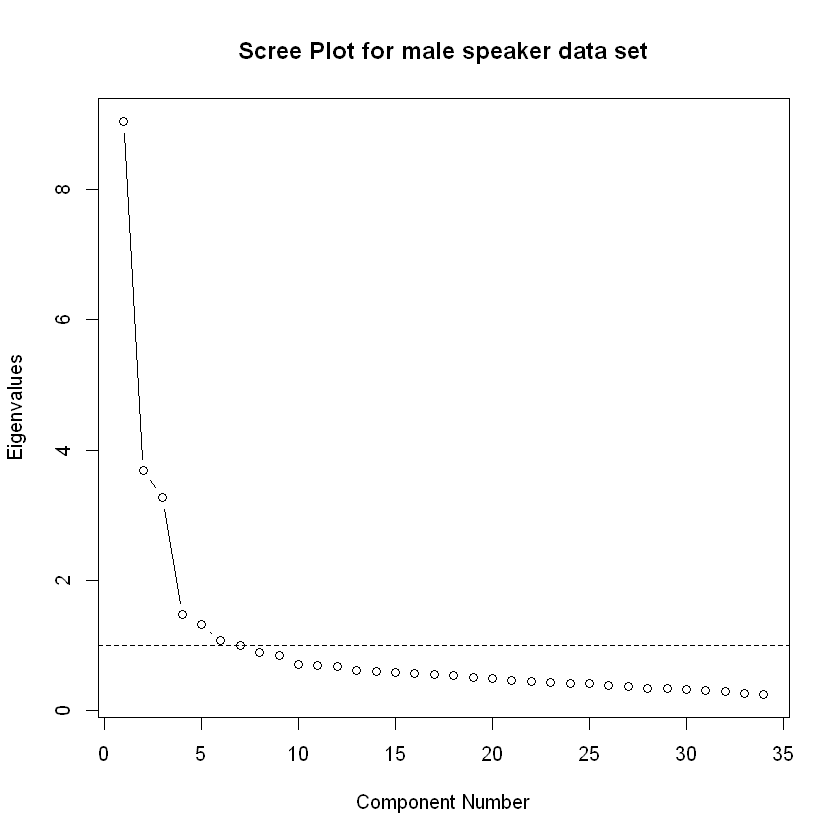

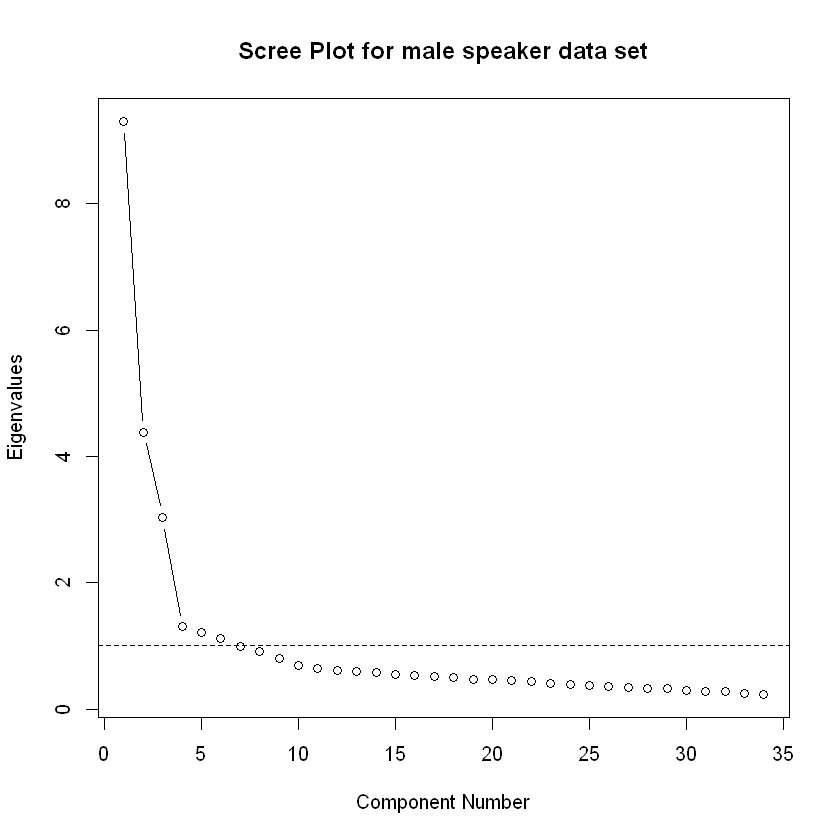

In [9]:
# Display scree plots for both data sets
plot(male_eigenvalues, main="Scree Plot for male speaker data set", ylab="Eigenvalues", xlab="Component Number",type='b') # b: plot points AND lines
abline(h=1, lty=2) # lty = line type (2 for dashed)
plot(female_eigenvalues, main="Scree Plot for male speaker data set", ylab="Eigenvalues", xlab="Component Number",type='b') # b: plot points AND lines
abline(h=1, lty=2) # lty = line type (2 for dashed) 

#### Note: As the point of inflexion is located at Component number = 4 for both data sets (with eigenvalue >= 1), we set the number of retained factors to 4

### Step 5: Conduct Principal Component Analysis based on previous steps

#### As we see above and remember from previous computations on the data set, there are many significant correlations between the possible factors. Therefore, we also wish to be able to include correlation between the factors to mitigate information loss of orthogonal rotation => oblique rotation.

### a.) For male speakers data subset

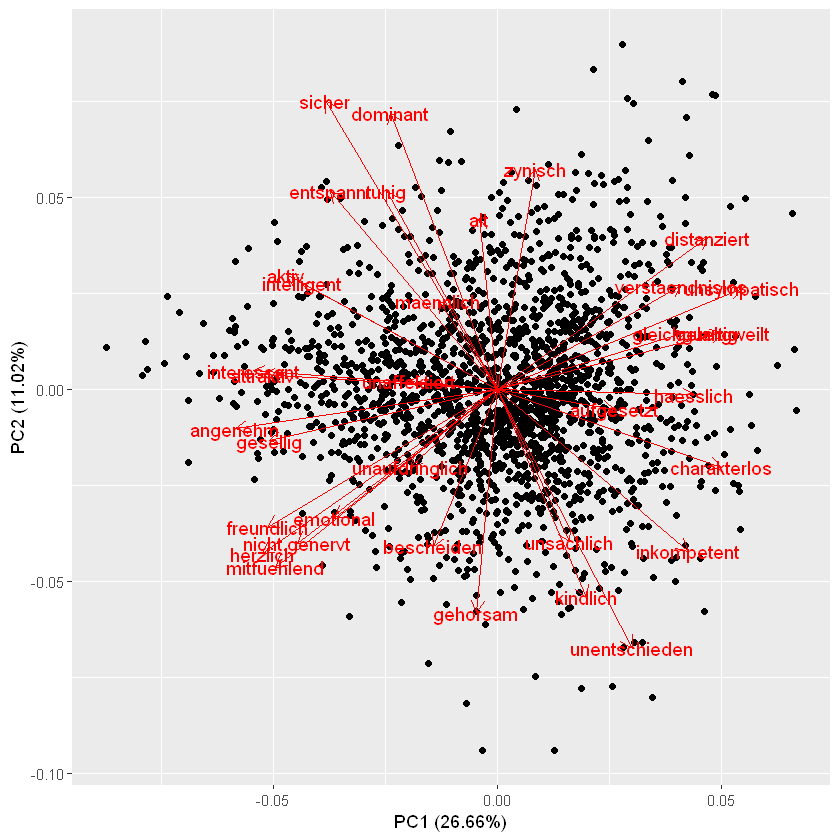

In [10]:
# by plotting: visible that there is very much correlation between PCs => oblique rotation, e.g. promax
autoplot(prcomp(male_data),
         loadings = TRUE, loadings.colour = 'red',
         loadings.label = TRUE, loadings.label.size = 4)

In [11]:
# very powerful function: handles eigenvalue decomposition, loadings for correlation matrix
pca_male <- principal(male_data, nfactor=4, covar=FALSE, impute='mean', rotate='promax')
pca_male

Principal Components Analysis
Call: principal(r = male_data, nfactors = 4, rotate = "promax", covar = FALSE, 
    impute = "mean")
Standardized loadings (pattern matrix) based upon correlation matrix
                  RC1   RC2   RC3   RC4   h2   u2 com
unsympatisch    -0.47  0.09 -0.13 -0.45 0.55 0.45 2.2
sicher           0.12  0.74 -0.24 -0.02 0.60 0.40 1.3
attraktiv        0.26 -0.10 -0.15  0.76 0.67 0.33 1.4
verstaendnislos -0.60 -0.17 -0.32  0.10 0.49 0.51 1.8
unentschieden   -0.15 -0.80  0.12  0.29 0.55 0.45 1.4
unaufdringlich  -0.07  0.10  0.61  0.16 0.48 0.52 1.2
distanziert     -0.65  0.17 -0.07 -0.22 0.52 0.48 1.4
gelangweilt     -0.75 -0.24 -0.02  0.16 0.60 0.40 1.3
emotional        0.63 -0.28 -0.18  0.22 0.50 0.50 1.8
nicht.genervt    0.49  0.07  0.43  0.01 0.47 0.53 2.0
aktiv            0.54  0.40 -0.31 -0.04 0.57 0.43 2.5
angenehm         0.32  0.03  0.16  0.58 0.65 0.35 1.7
charakterlos    -0.46 -0.31  0.17 -0.17 0.48 0.52 2.4
gesellig         0.63  0.01 -0.14  0.20 0.52

### For possible dimension / item loadings: Consider PCA results

### Note: factor loading = association of input variable to latent variable (same interpretation as correlation coefficients)

In [12]:
# Compute predicted component scores based on previous PCA results
reduced_male_data <- predict(pca_male, male_data)
head(reduced_male_data)

RC1,RC2,RC3,RC4
0.8723607,0.28493424,-1.1018252,0.3133423
-0.7306877,-0.59923959,-0.3061567,-0.4666251
0.3507160,-0.76582189,-0.3758988,-0.1221638
-1.0757909,0.03949735,-0.1203502,-0.3541822
0.3874814,0.59389893,-0.9675972,0.2404673
-0.4240642,-0.37586494,-0.1158139,-0.5630560


### b.) For female speakers data subset

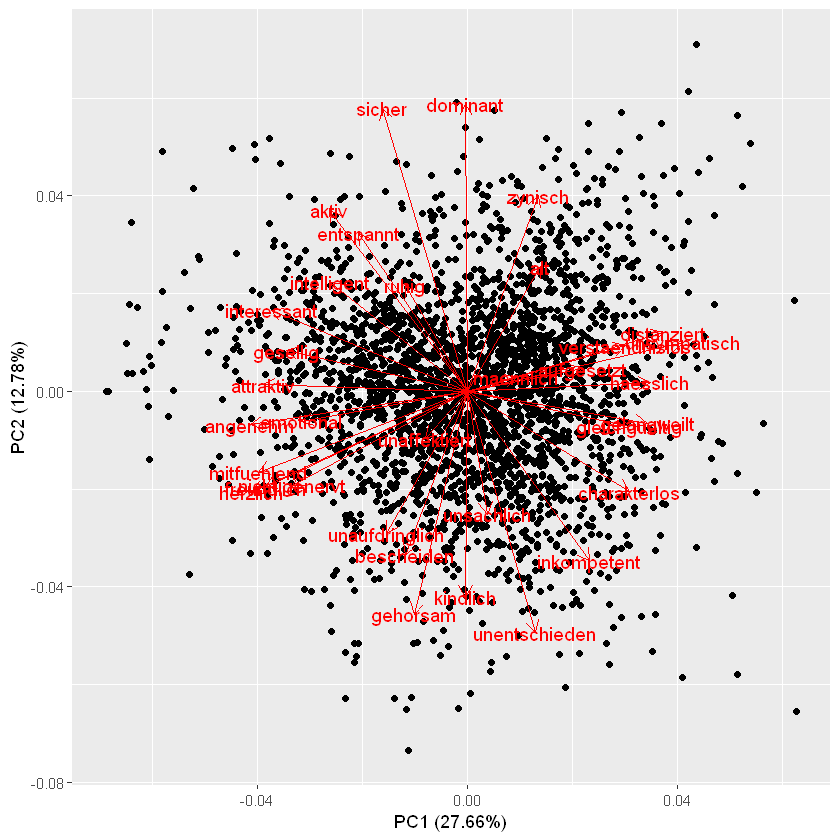

In [13]:
# by plotting: visible that there is very much correlation between PCs => oblique rotation, e.g. promax
autoplot(prcomp(female_data),
         loadings = TRUE, loadings.colour = 'red',
         loadings.label = TRUE, loadings.label.size = 4)

In [14]:
# very powerful function: handles eigenvalue decomposition, loadings for correlation matrix
pca_female <- principal(female_data, nfactor=4, covar=FALSE, impute='mean', rotate='promax')
pca_female

Principal Components Analysis
Call: principal(r = female_data, nfactors = 4, rotate = "promax", covar = FALSE, 
    impute = "mean")
Standardized loadings (pattern matrix) based upon correlation matrix
                  RC1   RC2   RC4   RC3   h2   u2 com
unsympatisch    -0.67 -0.05  0.04 -0.26 0.58 0.42 1.3
sicher           0.11 -0.61  0.32  0.18 0.59 0.41 1.8
attraktiv        0.68 -0.02  0.09  0.27 0.59 0.41 1.3
verstaendnislos -0.50  0.09  0.25 -0.12 0.43 0.57 1.7
unentschieden   -0.03  0.66 -0.12 -0.04 0.49 0.51 1.1
unaufdringlich   0.03  0.04 -0.42  0.51 0.55 0.45 1.9
distanziert     -0.76 -0.17 -0.03 -0.04 0.54 0.46 1.1
gelangweilt     -0.68  0.23  0.16  0.31 0.64 0.36 1.8
emotional        0.77  0.15  0.05 -0.26 0.54 0.46 1.3
nicht.genervt    0.48 -0.04 -0.35  0.12 0.46 0.54 2.0
aktiv            0.49 -0.41  0.16 -0.24 0.56 0.44 2.7
angenehm         0.65 -0.04 -0.08  0.37 0.68 0.32 1.6
charakterlos    -0.58  0.18 -0.19 -0.01 0.44 0.56 1.4
gesellig         0.74  0.01  0.17 -0.10 0.

### For possible dimension / item loadings: Consider PCA results

### Note: factor loading = association of input variable to latent variable (same interpretation as correlation coefficients)

In [15]:
# Compute predicted component scores based on previous PCA results
reduced_female_data <- predict(pca_female, female_data)
head(reduced_female_data)

RC1,RC2,RC4,RC3
1.0953176,-0.5671277,0.52859205,1.0794232
2.8067730,-1.4026051,-0.84610245,1.9730956
0.9459072,-0.5092572,-1.71673060,0.9823181
0.8540802,-0.2948597,0.77366139,-0.6174143
-1.0827079,1.4120424,-0.35388859,-0.7574372
1.6392220,-1.3794229,0.04837387,1.4666461


### Step 6: Compute Cronbach's Alpha for both data sets

In [16]:
# For female data set
original_female_alpha <- psych::alpha(female_data, check.keys=TRUE)$total$raw_alpha
reduced_female_alpha <- psych::alpha(reduced_female_data, check.keys=TRUE)$total$raw_alpha
paste0('Original Cronbach Alpha: ', round(original_female_alpha, digits=3), ' => ', 'Reduced Cronbach Alpha: ', round(reduced_female_alpha, digits=3))

Warning message in psych::alpha(female_data, check.keys = TRUE):
"Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name."Warning message in psych::alpha(reduced_female_data, check.keys = TRUE):
"Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name."

[1] "Original Cronbach Alpha: 0.898 => Reduced Cronbach Alpha: 0.319"

In [17]:
# For male data set
original_male_alpha <- psych::alpha(male_data, check.keys=TRUE)$total$raw_alpha
reduced_male_alpha <- psych::alpha(reduced_male_data, check.keys=TRUE)$total$raw_alpha
paste0('Original Cronbach Alpha: ', round(original_male_alpha, digits=3), ' => ', 'Reduced Cronbach Alpha: ', round(reduced_male_alpha, digits=3))

Warning message in psych::alpha(male_data, check.keys = TRUE):
"Some items were negatively correlated with total scale and were automatically reversed.
 This is indicated by a negative sign for the variable name."

[1] "Original Cronbach Alpha: 0.9 => Reduced Cronbach Alpha: 0.537"